In [1]:
import numpy as np
import torch
from src.MinAggGNN import MinAggGNN
import matplotlib.pyplot as plt

device = torch.device('cuda')
K = 2
m = 2
eta = 0.0003
epochs = 20000

model = MinAggGNN(1, 8, K, 1, edge_dim = 1)
model.load_state_dict(torch.load('model_progress/model_final.pt'))
model.eval()
model.to(device)

MinAggGNN(1, 1, num_layers=2)

In [2]:
model_checkpoints = torch.load('model_progress/model_checkpoints.pt')
mse_losses = torch.load('model_progress/mse_losses.pt')
l1_regs = torch.load('model_progress/l1_regs.pt')
test_losses = torch.load('model_progress/test_losses.pt')

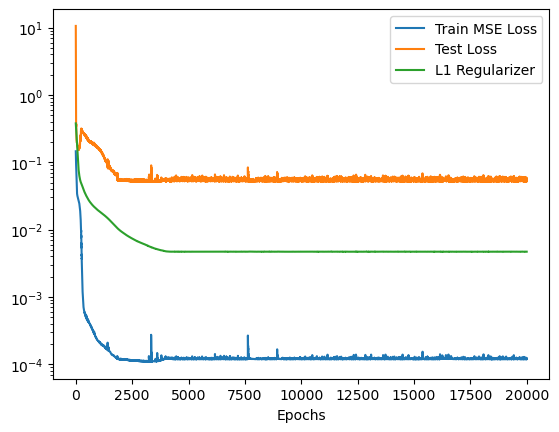

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(mse_losses.detach())
ax.plot(test_losses.detach())
ax.plot((eta * l1_regs).detach())
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.legend(labels=['Train MSE Loss', 'Test Loss', 'L1 Regularizer'])

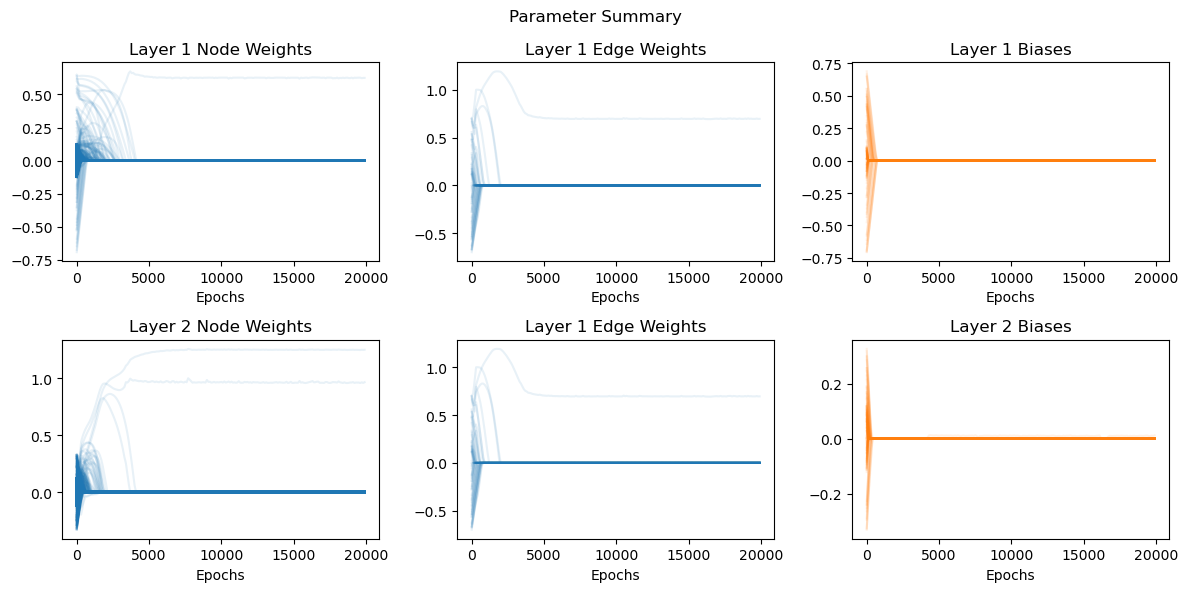

In [4]:
node_weights_0 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.0.agg_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(model.state_dict()['convs.0.agg_mlp.lins.1.weight'][:,:-1].flatten())
                         ))
node_weights_1 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.1.agg_mlp.lins.0.weight'][:,:-1].flatten())
                         + len(model.state_dict()['convs.1.agg_mlp.lins.1.weight'][:,:-1].flatten())
                         ))
edge_weights_0 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.0.agg_mlp.lins.0.weight'][:,-1].flatten())
                         ))
edge_weights_1 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.1.agg_mlp.lins.0.weight'][:,-1].flatten())
                         ))
biases_0 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.0.agg_mlp.lins.0.bias'].flatten())
                         + len(model.state_dict()['convs.0.agg_mlp.lins.1.bias'].flatten())
                         ))
biases_1 = torch.empty((len(model_checkpoints),
                         len(model.state_dict()['convs.1.agg_mlp.lins.0.bias'].flatten())
                         + len(model.state_dict()['convs.1.agg_mlp.lins.1.bias'].flatten())
                         ))
for i, checkpoint in enumerate(model_checkpoints):
    node_weights_0[i] = torch.cat((checkpoint['convs.0.agg_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.0.agg_mlp.lins.1.weight'][:,:-1].flatten()))
    node_weights_1[i] = torch.cat((checkpoint['convs.1.agg_mlp.lins.0.weight'][:,:-1].flatten(),
                              checkpoint['convs.1.agg_mlp.lins.1.weight'][:,:-1].flatten()))
    edge_weights_0[i] = checkpoint['convs.0.agg_mlp.lins.0.weight'][:,-1].flatten()
    edge_weights_1[i] = checkpoint['convs.1.agg_mlp.lins.0.weight'][:,-1].flatten()
    biases_0[i] = torch.cat((checkpoint['convs.0.agg_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.0.agg_mlp.lins.1.bias'].flatten()))
    biases_1[i] = torch.cat((checkpoint['convs.1.agg_mlp.lins.0.bias'].flatten(),
                              checkpoint['convs.1.agg_mlp.lins.1.bias'].flatten()))
    
fig, ax = plt.subplots(2,3, figsize = (12,6))

n_ticks = 5
ax[0,0].set_title('Layer 1 Node Weights')
ax[0,0].plot(node_weights_0.detach(), c = 'tab:blue', alpha = 0.1)

ax[0,1].set_title('Layer 1 Edge Weights')
ax[0,1].plot(edge_weights_0.detach(), c = 'tab:blue', alpha = 0.1)

ax[0,2].set_title('Layer 1 Biases')
ax[0,2].plot(biases_0.detach(), c = 'tab:orange', alpha = 0.1)

ax[1,0].set_title('Layer 2 Node Weights')
ax[1,0].plot(node_weights_1.detach(), c = 'tab:blue', alpha = 0.1)

ax[1,1].set_title('Layer 1 Edge Weights')
ax[1,1].plot(edge_weights_0.detach(), c = 'tab:blue', alpha = 0.1)

ax[1,2].set_title('Layer 2 Biases')
ax[1,2].plot(biases_1.detach(), c = 'tab:orange', alpha = 0.1)

for axes in ax.flatten():
    axes.set_xticks([0, 50, 100, 150, 200])
    axes.set_xticklabels([0, 5000, 10000, 15000, 20000])
    axes.set_xlabel('Epochs')

fig.suptitle('Parameter Summary')
fig.tight_layout()